In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
file_path = "C:/Users/gotlu/Downloads/archive (8)/day.csv"
df = pd.read_csv(file_path)
print(df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [5]:
# Check 1st Five rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Check last 5 rows
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [10]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
df.drop(["dteday"],axis=1 ,inplace=True)

In [12]:
df.head()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [14]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [15]:
df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [16]:
df['mnth'].value_counts()

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

In [17]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [18]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
numeric_features = df.describe().columns
numeric_features

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [20]:
categorical_columns = list(set(df.columns) - set(numeric_features))
categorical_columns

[]

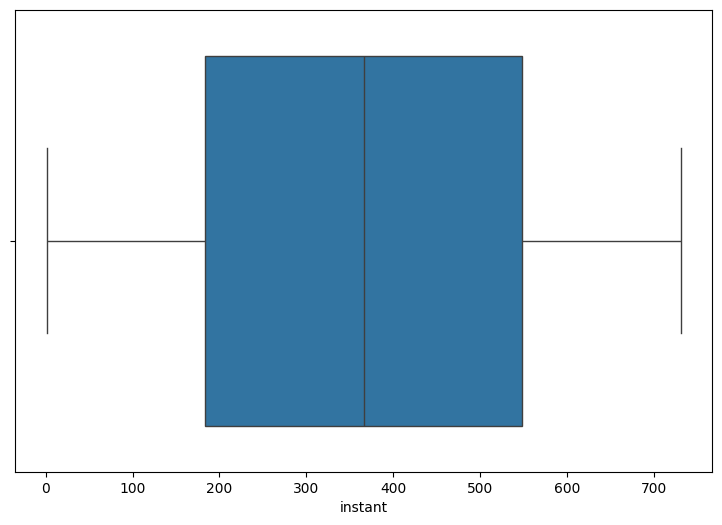

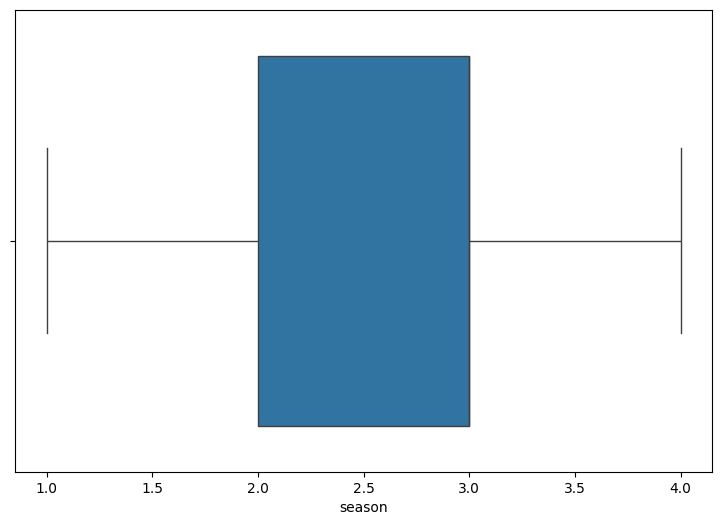

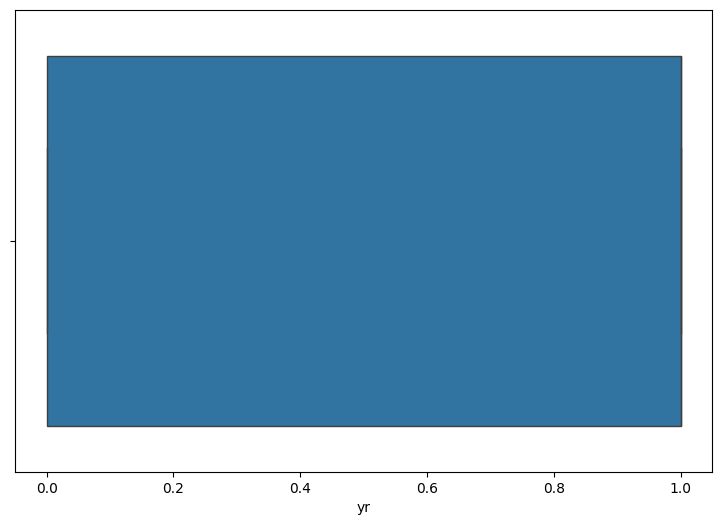

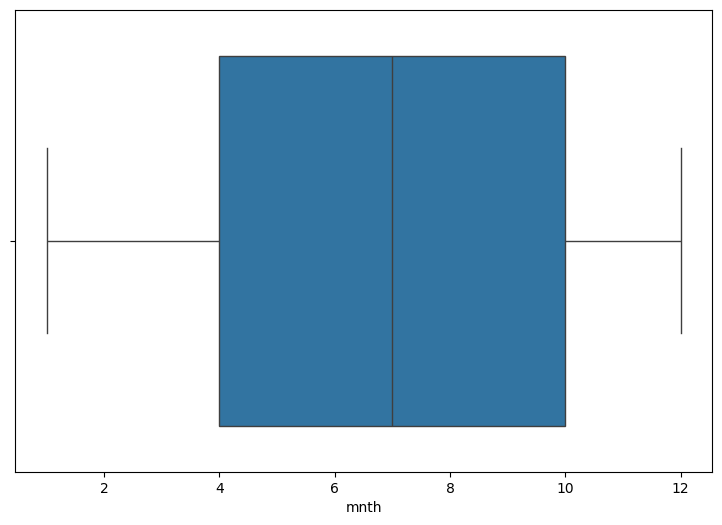

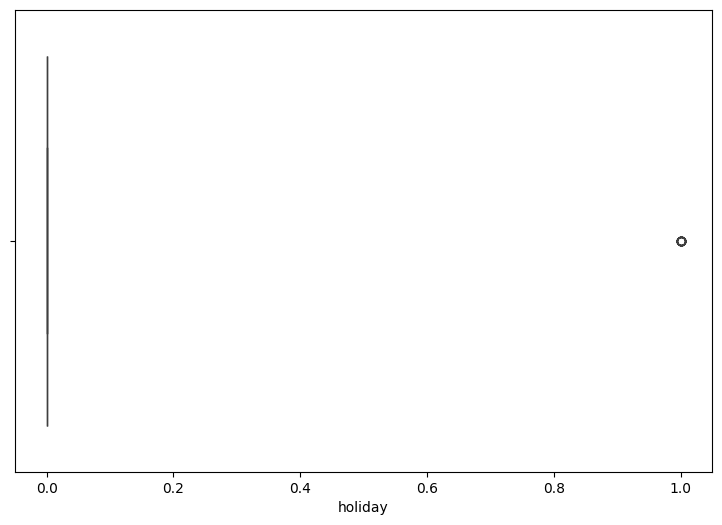

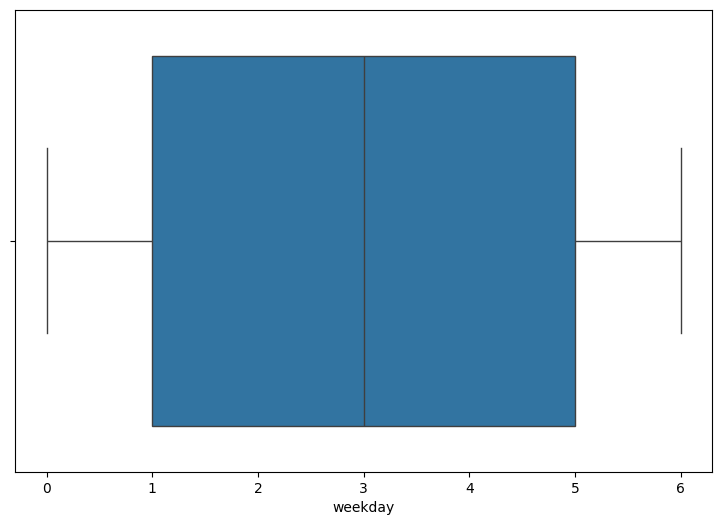

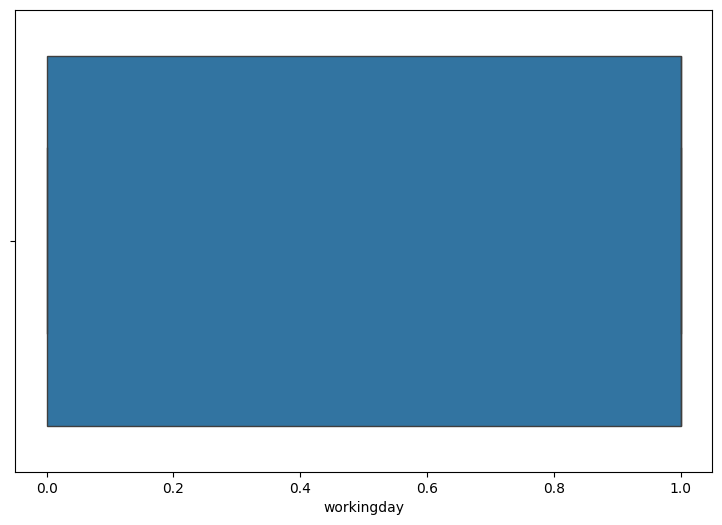

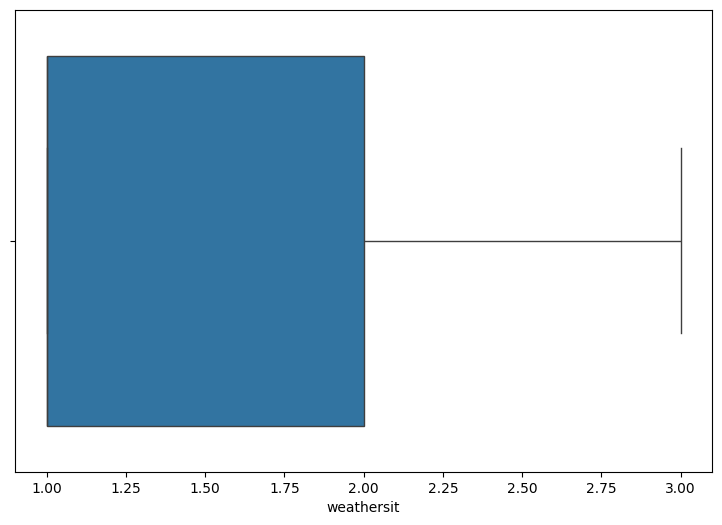

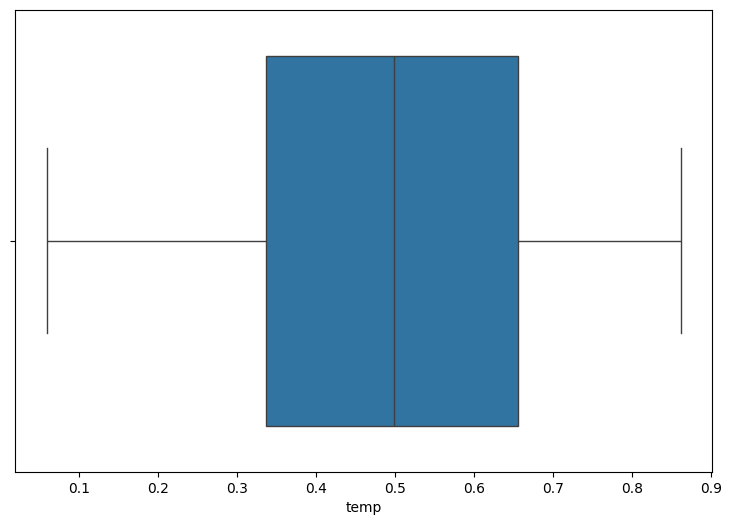

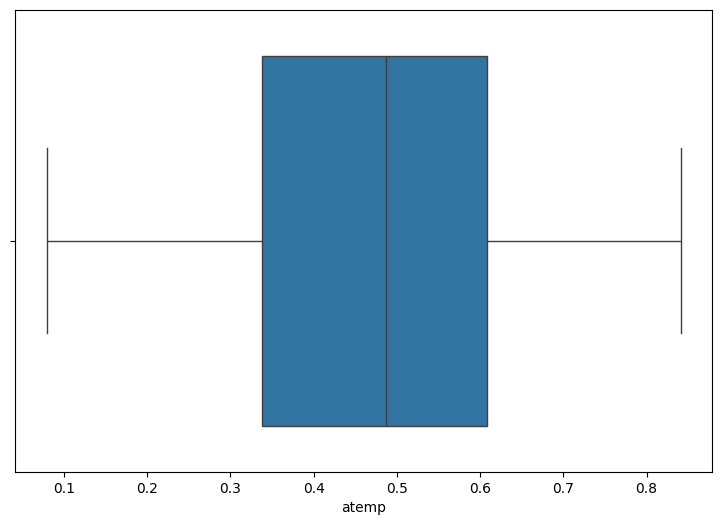

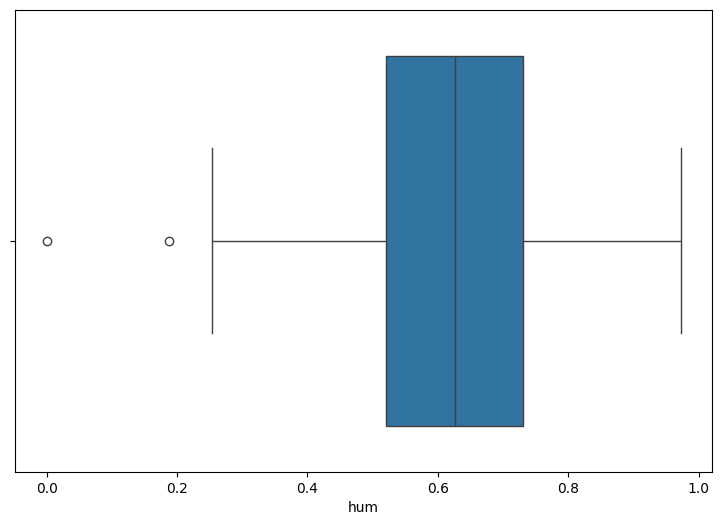

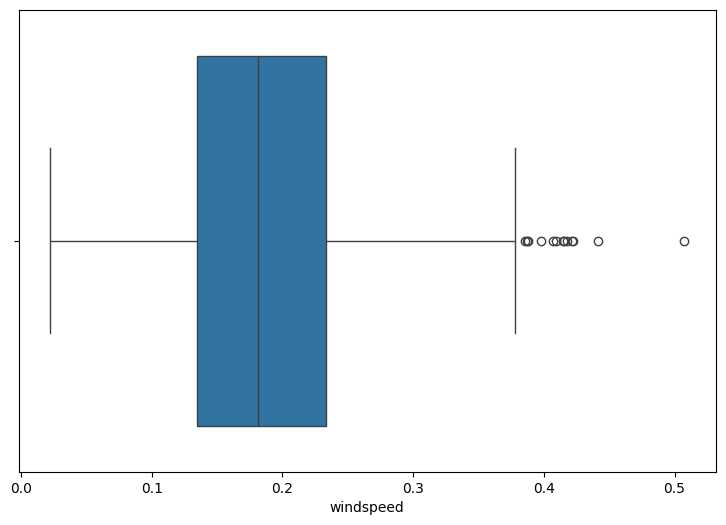

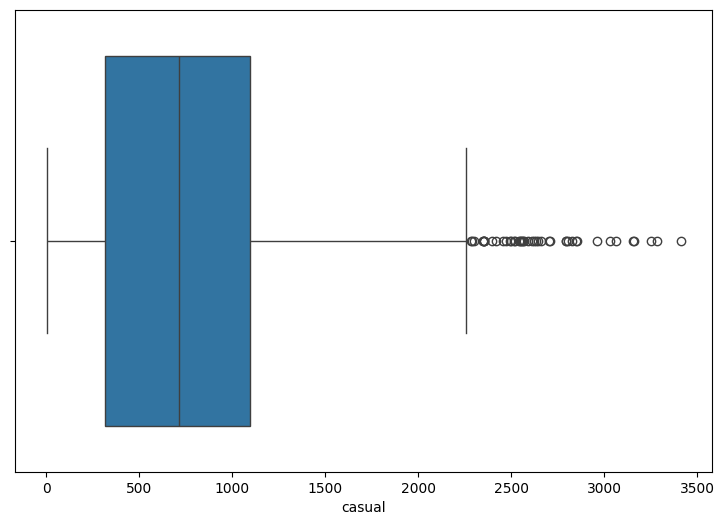

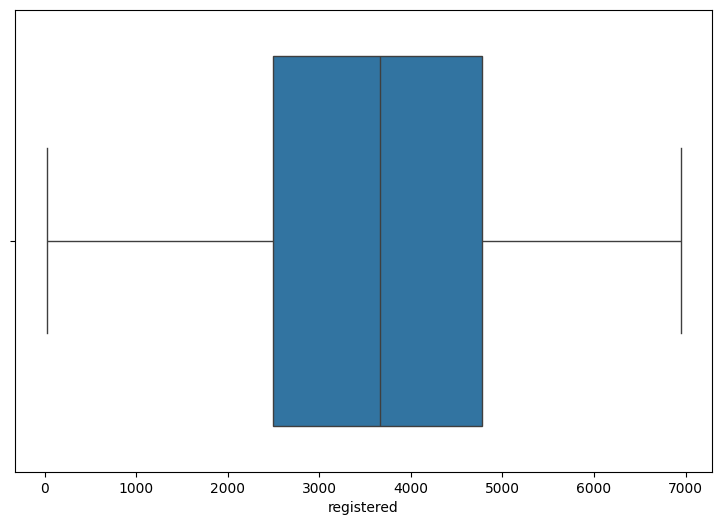

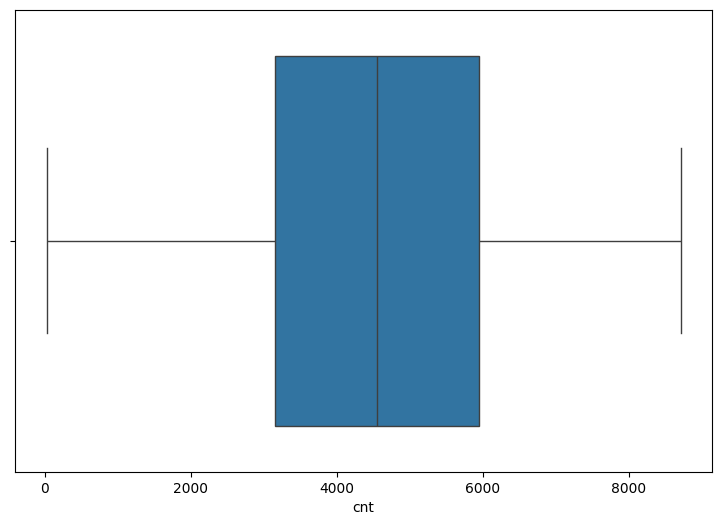

In [21]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

Text(0.5, 1.0, 'Bike Rentals by Weekday and Holiday')

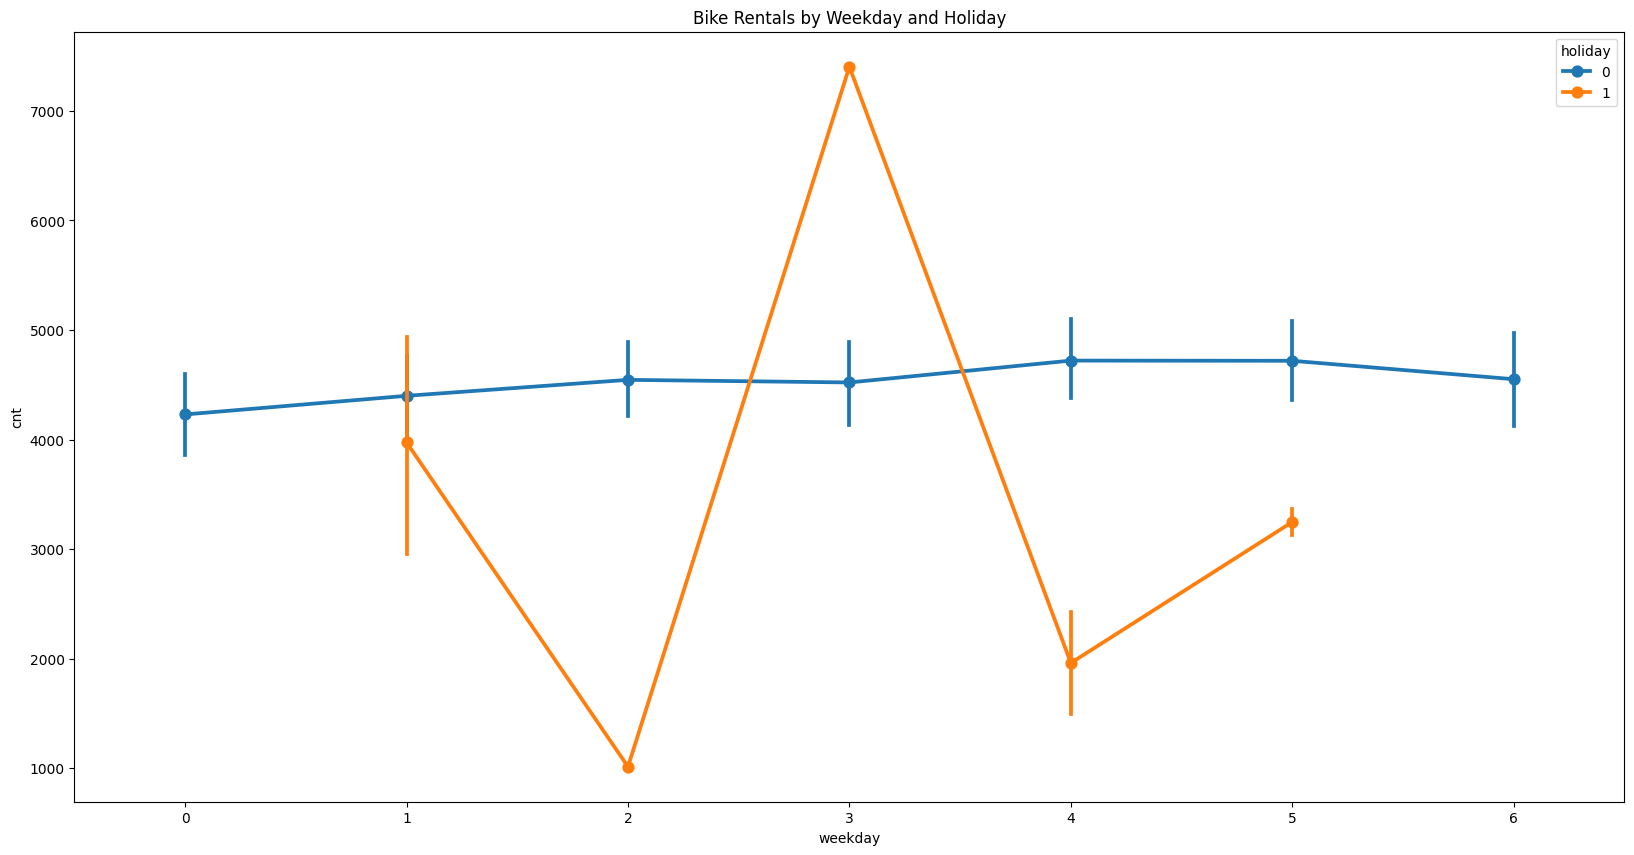

In [22]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['holiday'])
plt.title("Bike Rentals by Weekday and Holiday")

Text(0.5, 1.0, 'Impact of Seasonal Humidity on Bike Rental Counts')

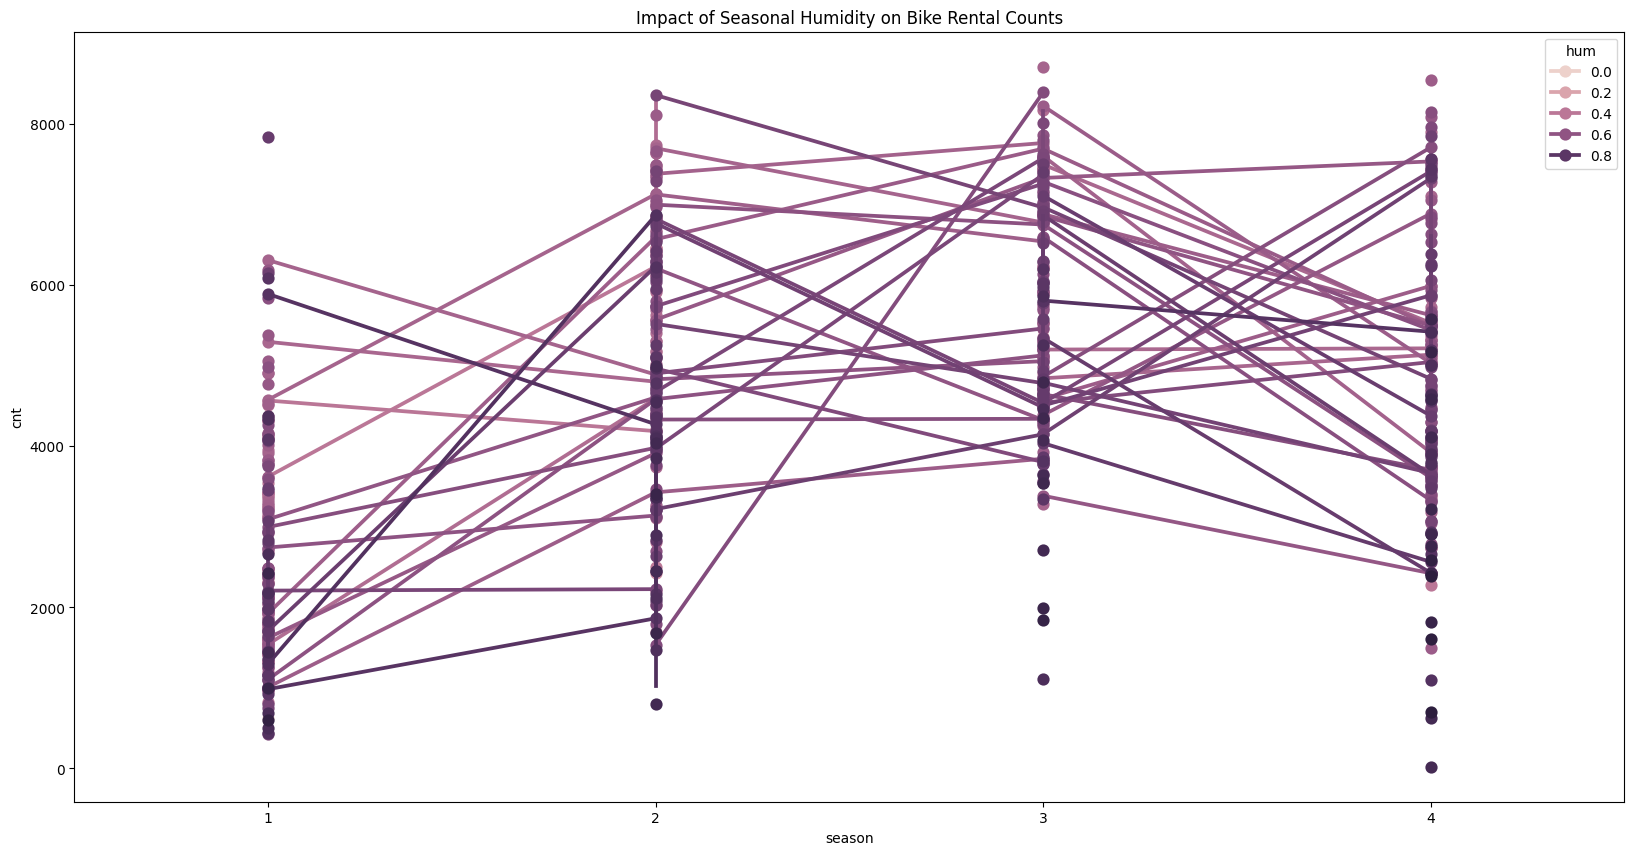

In [122]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['season'],y = df['cnt'],hue = df['hum'])
plt.title("Impact of Seasonal Humidity on Bike Rental Counts")

Text(0.5, 1.0, 'Impact of windspeed and temperature on Bike Rental Counts')

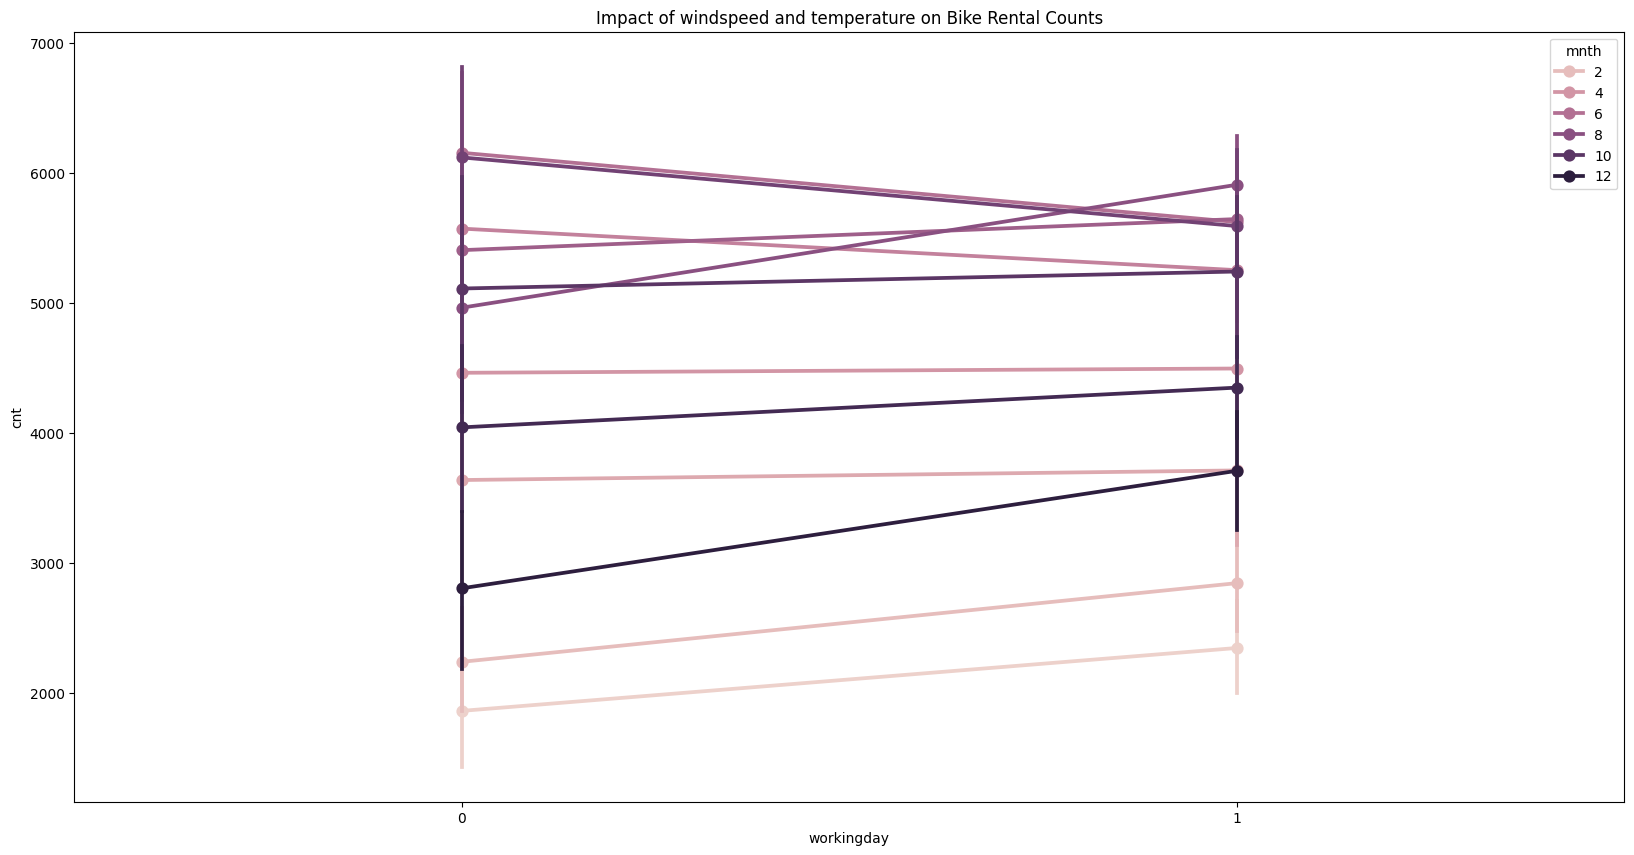

In [123]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['workingday'],y = df['cnt'],hue = df['mnth'])
plt.title("Impact of windspeed and temperature on Bike Rental Counts")

C:\Users\gotlu\AppData\Local\Temp\ipykernel_24796\3218089280.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df['cnt'],color='g',ax=axes[0])


<Axes: xlabel='cnt'>

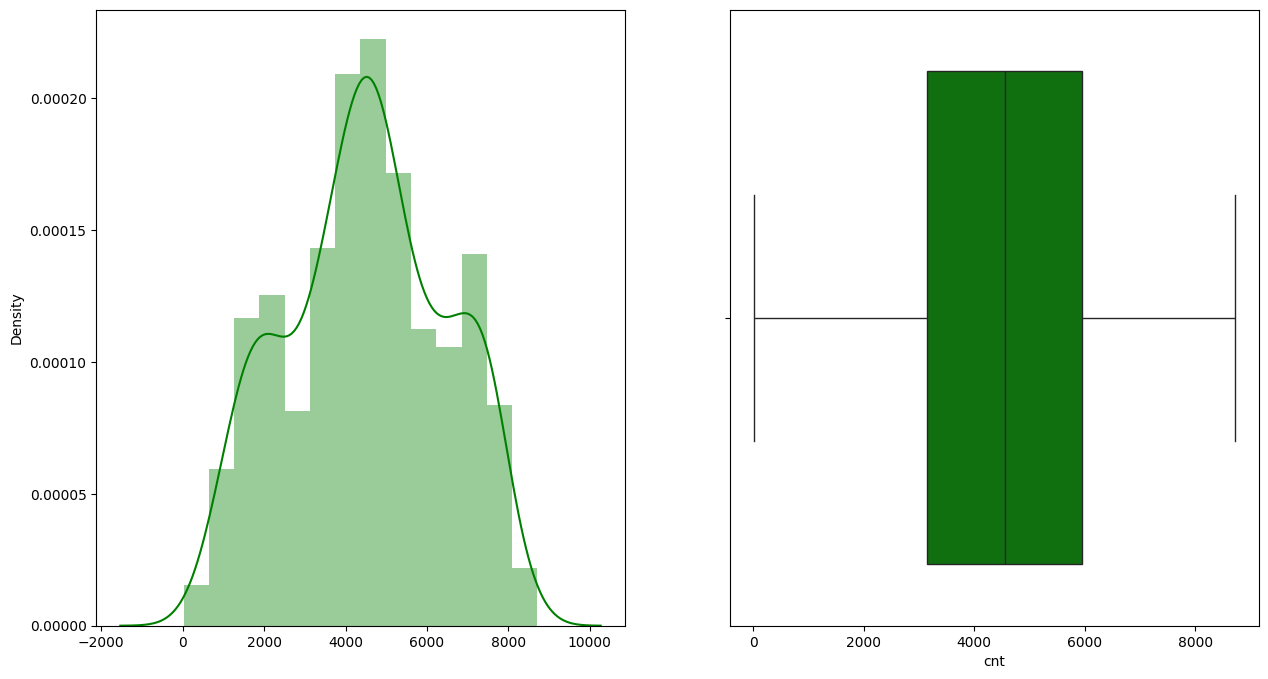

In [23]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['cnt'],color='g',ax=axes[0])
sns.boxplot(x = df['cnt'],color='g',ax=axes[1])

C:\Users\gotlu\AppData\Local\Temp\ipykernel_26488\2042711442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= np.sqrt(df['cnt']),color='g',ax=axes[0])


<Axes: xlabel='cnt'>

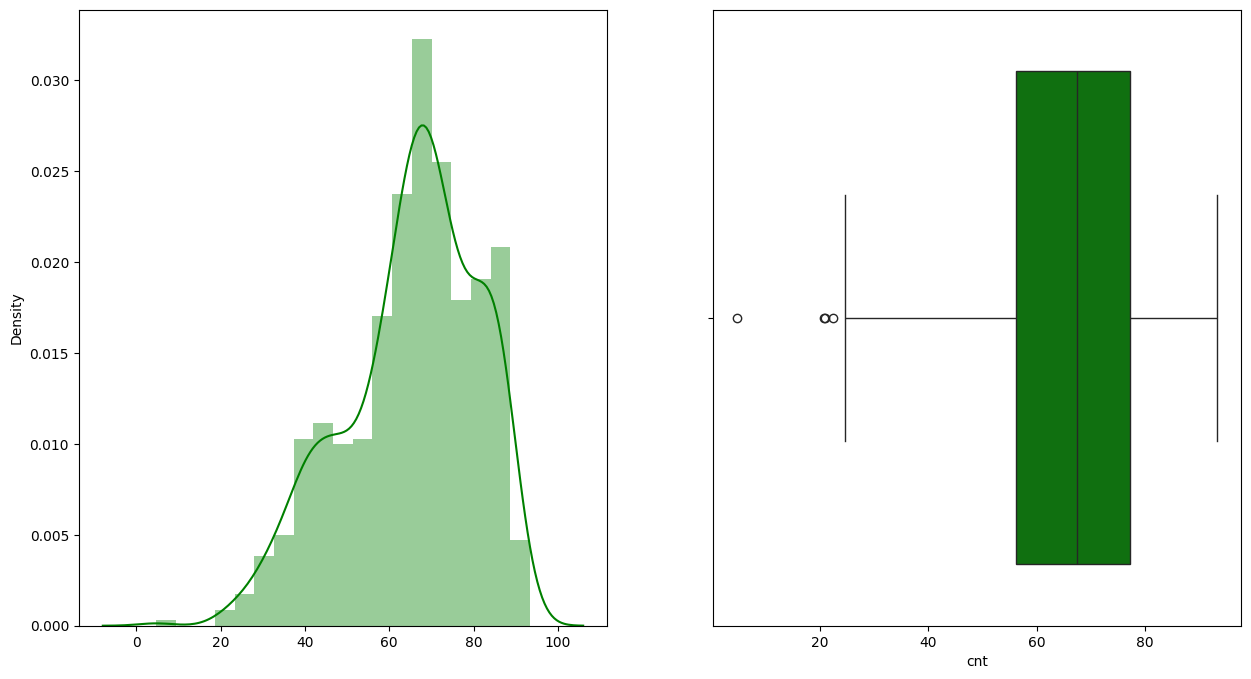

In [125]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= np.sqrt(df['cnt']),color='g',ax=axes[0])
sns.boxplot(x = np.sqrt(df['cnt']),color='g',ax=axes[1])

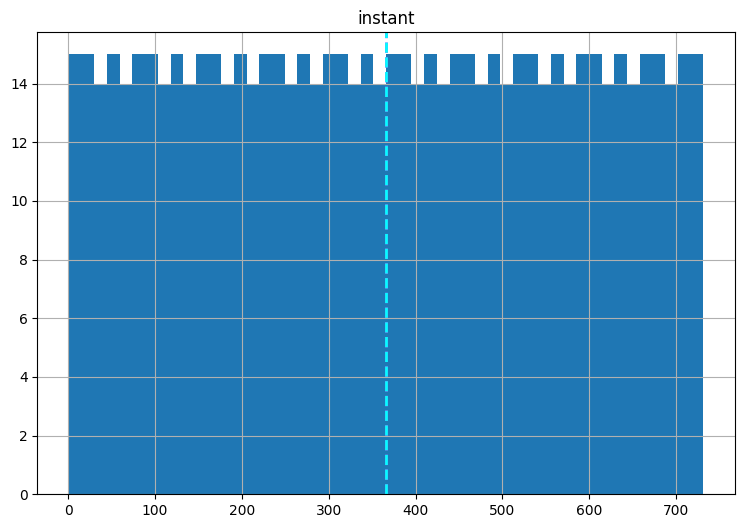

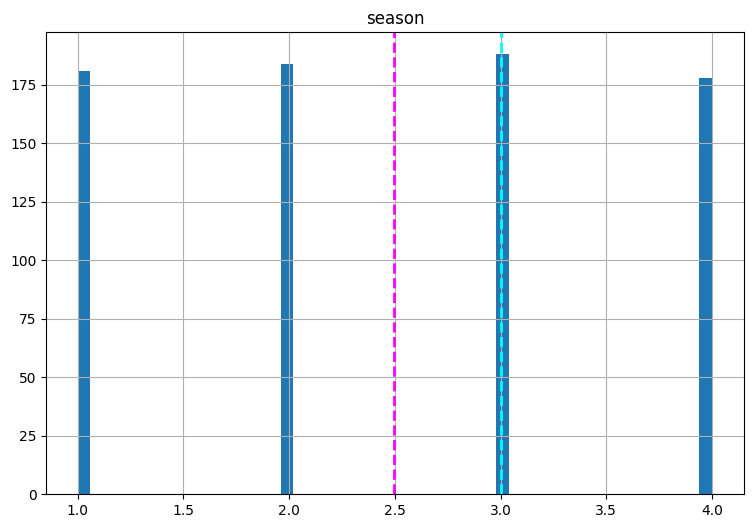

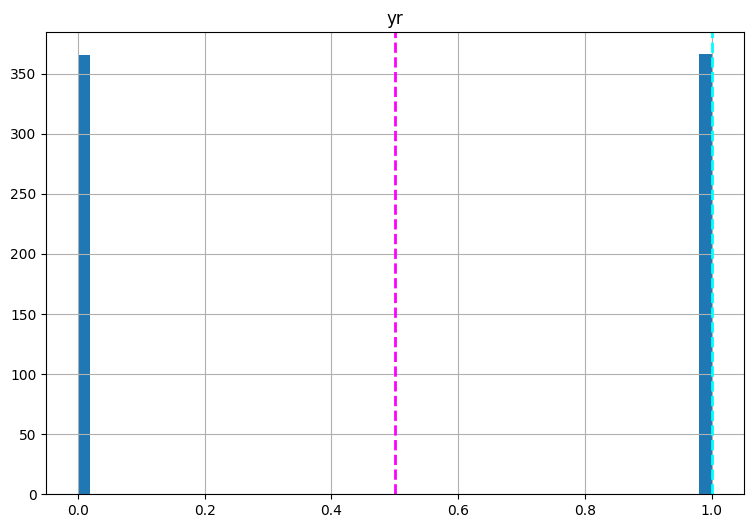

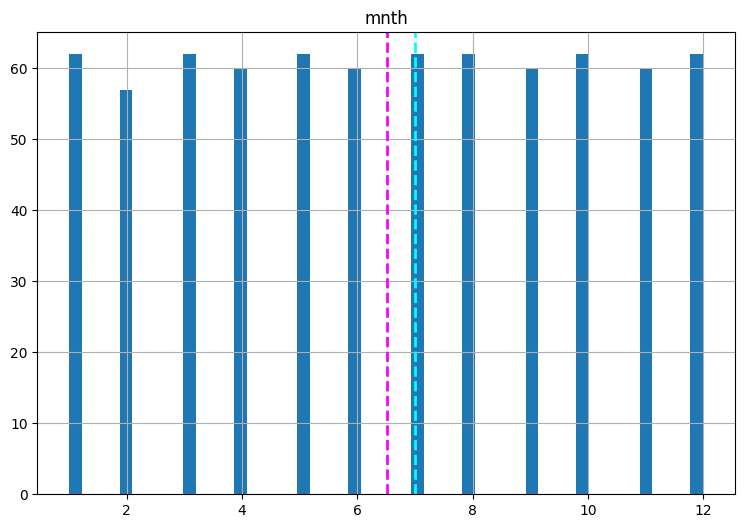

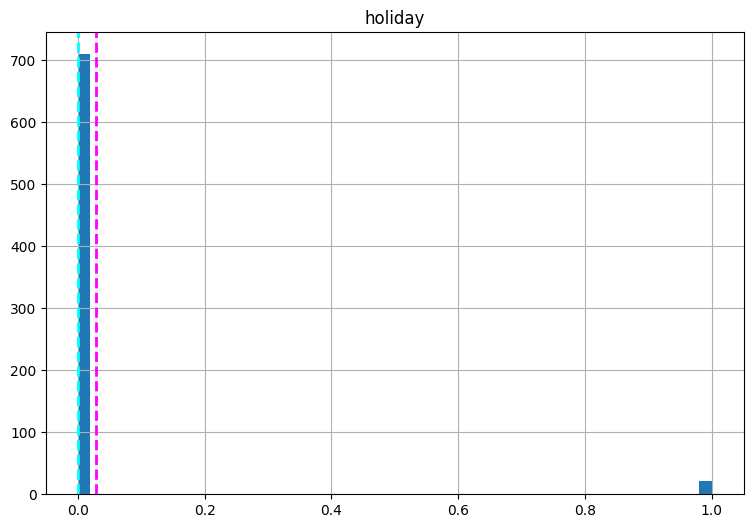

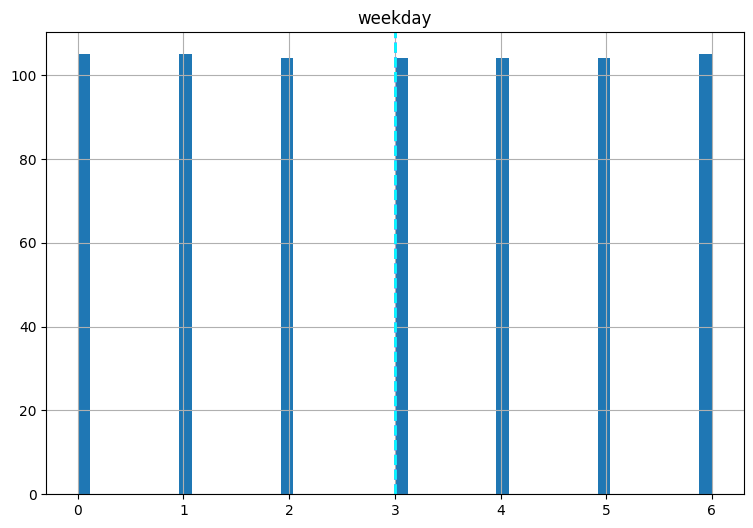

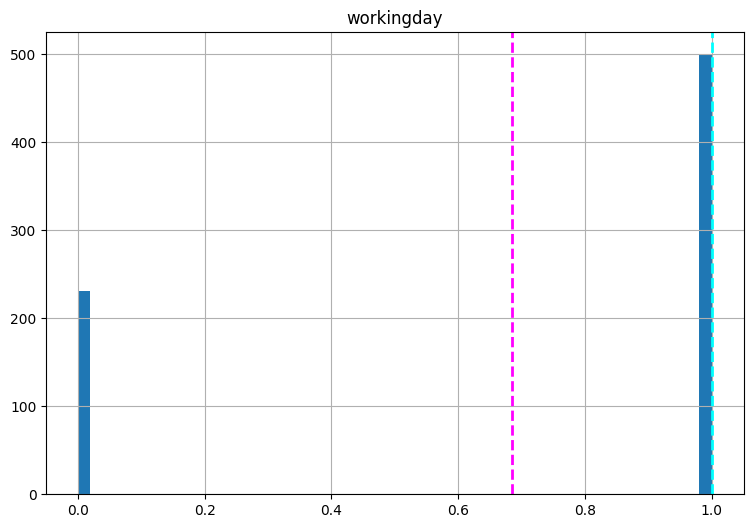

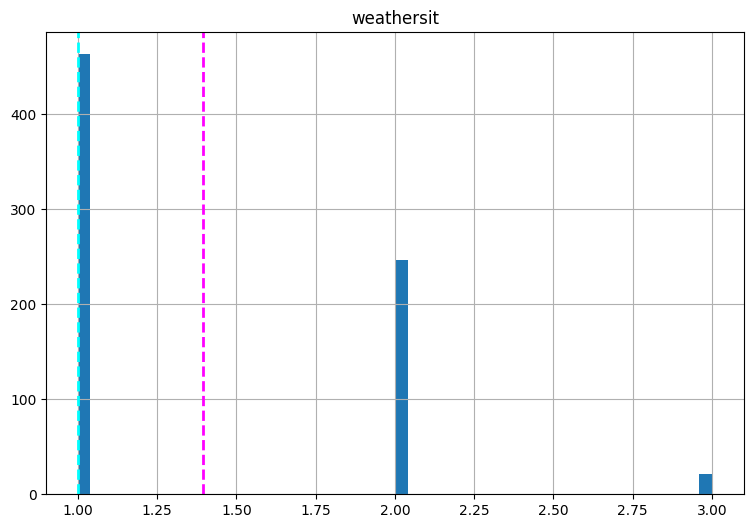

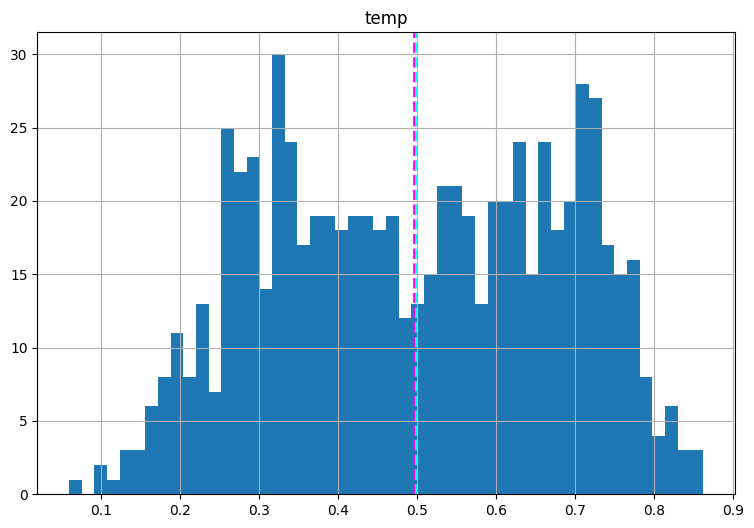

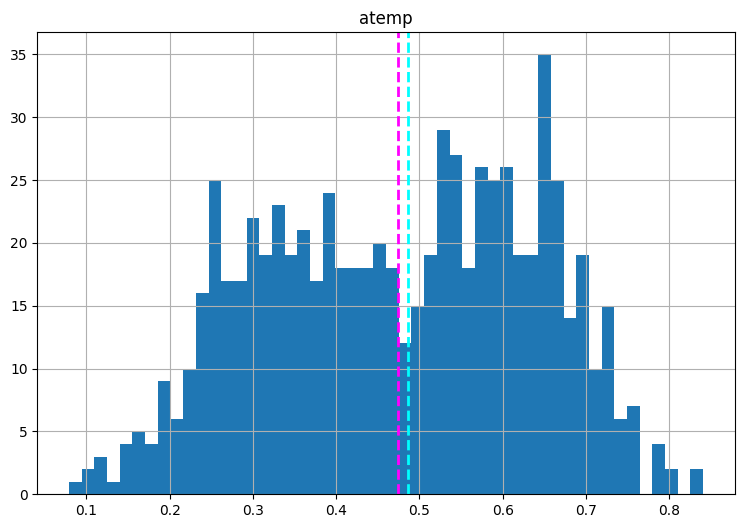

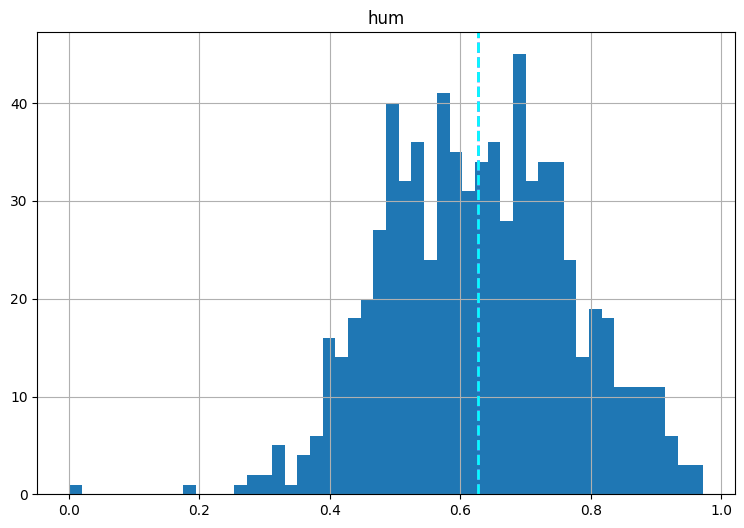

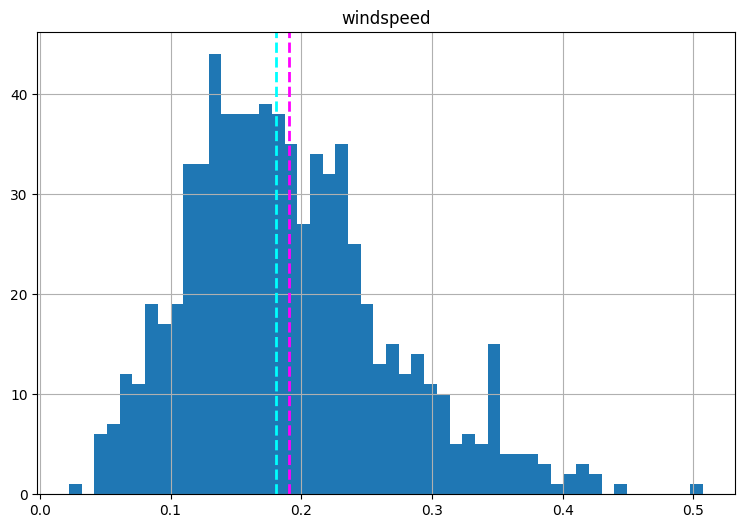

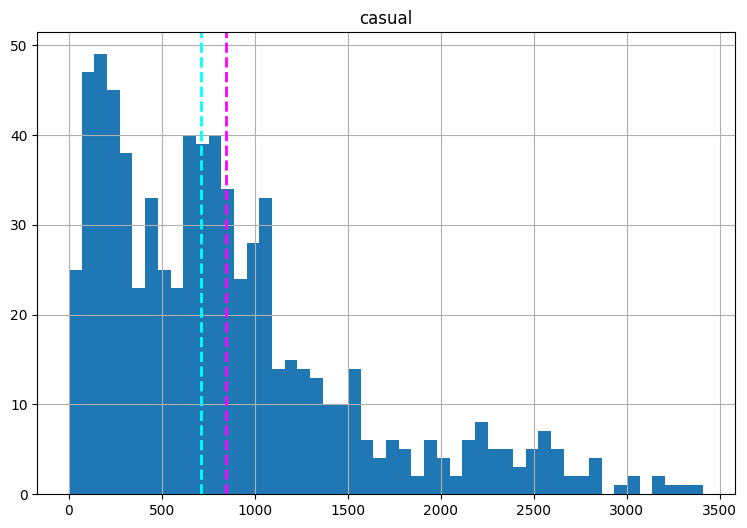

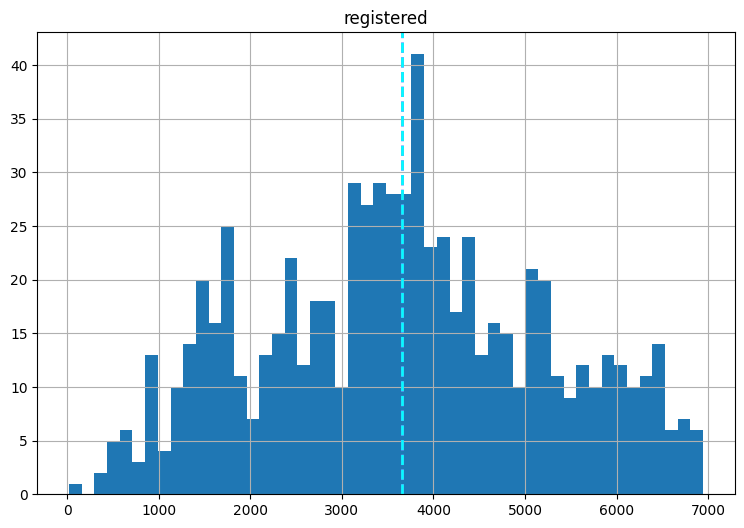

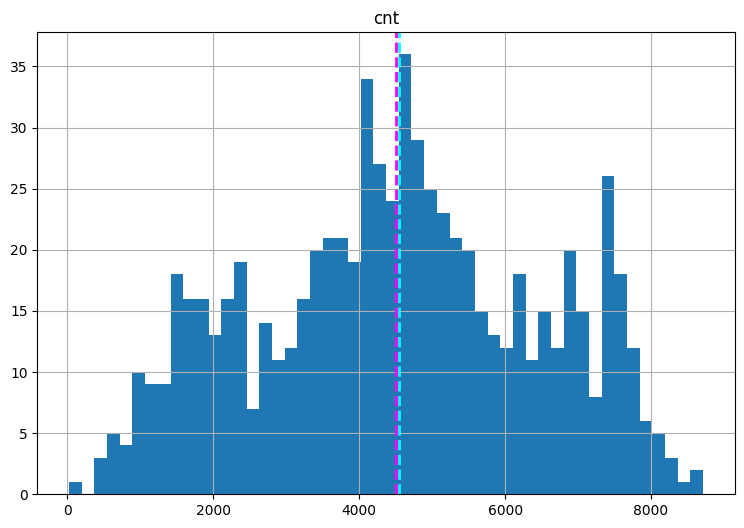

In [126]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

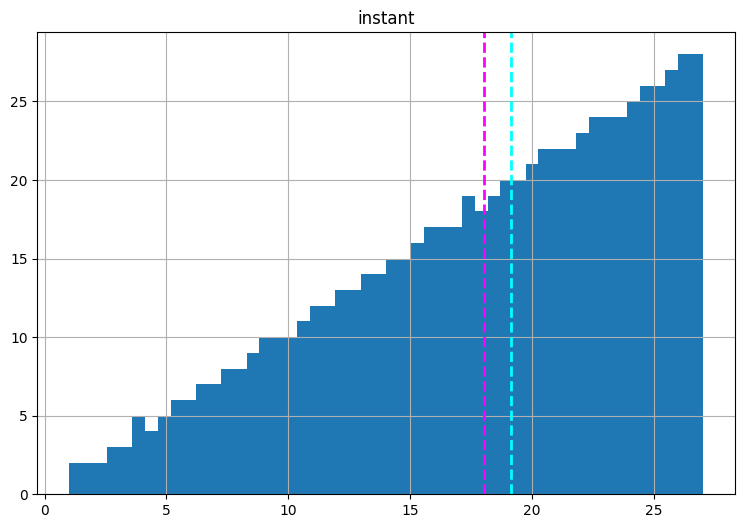

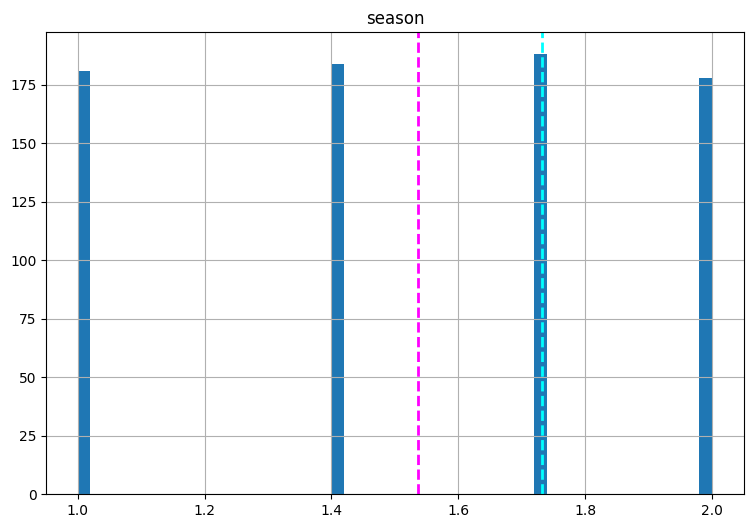

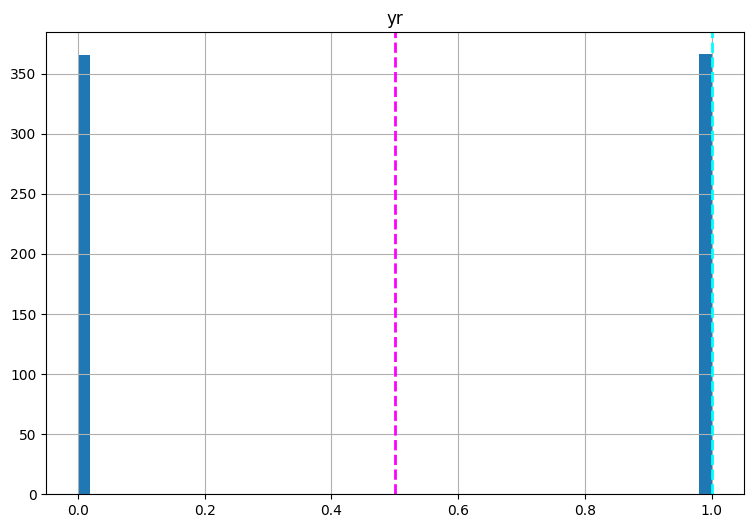

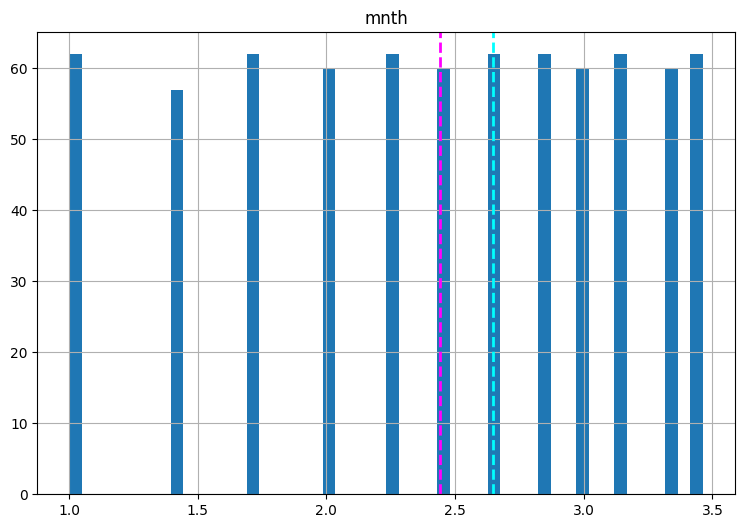

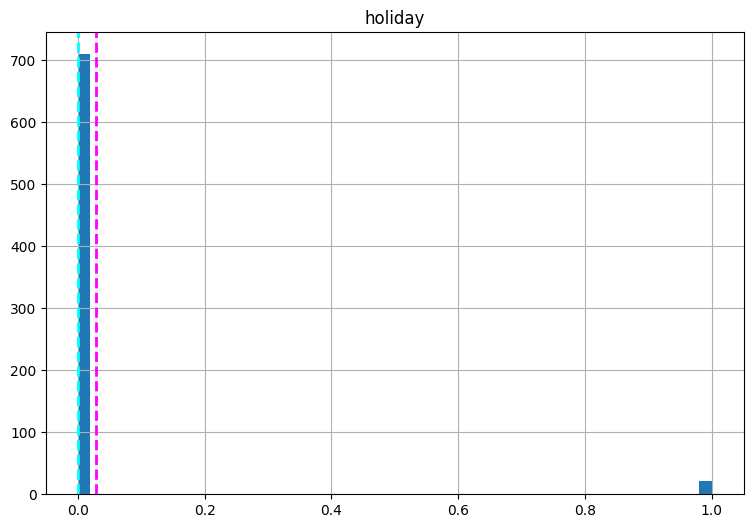

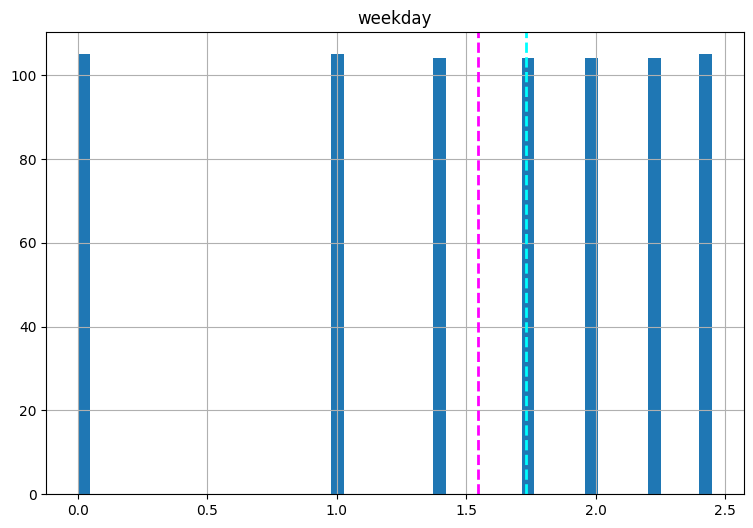

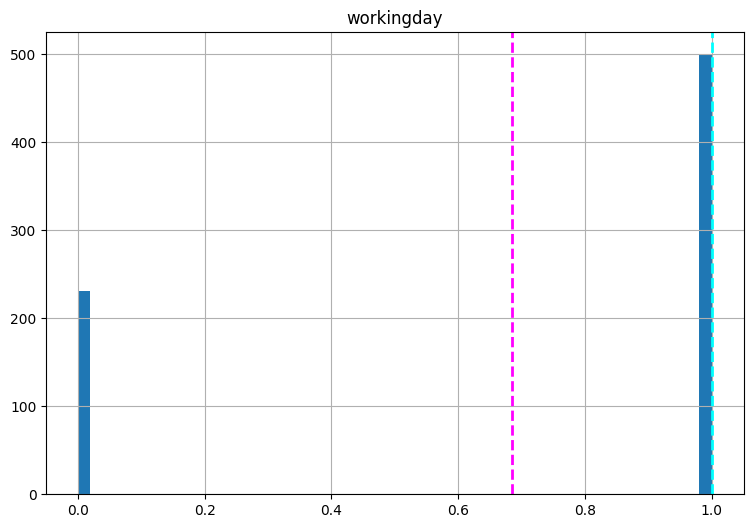

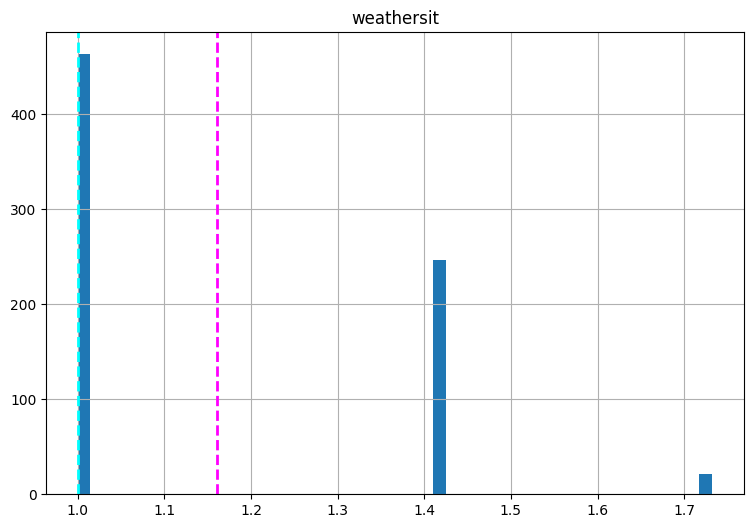

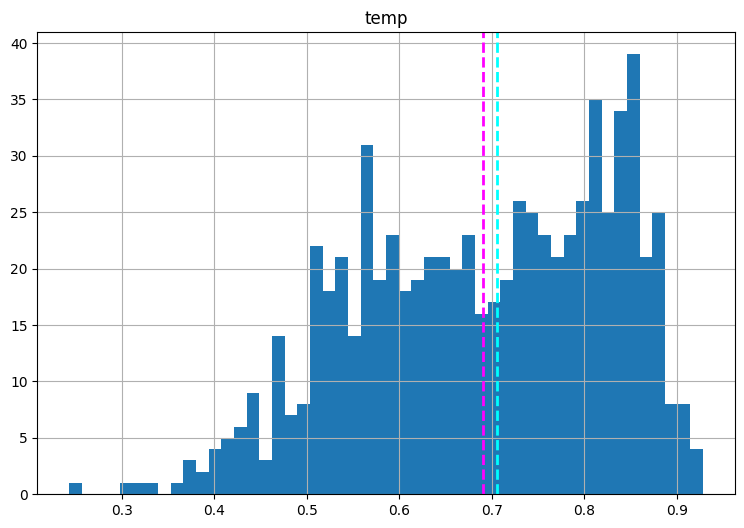

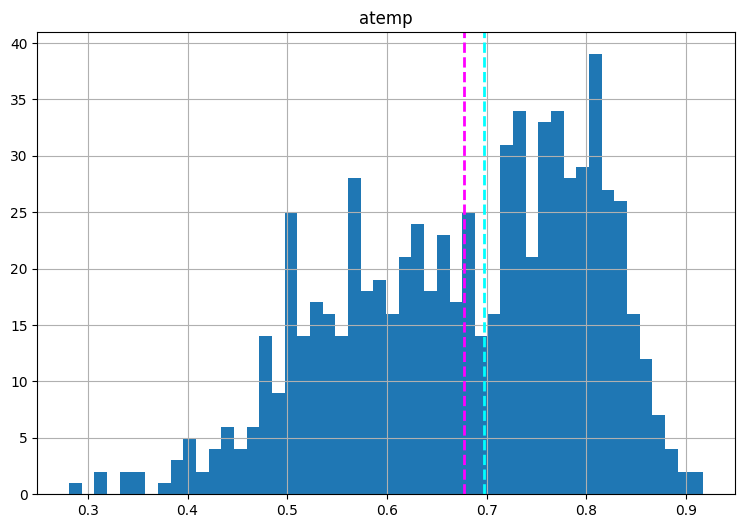

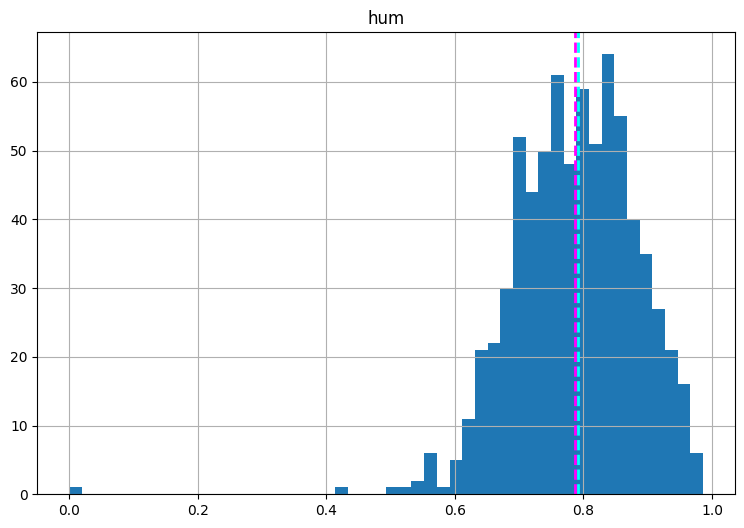

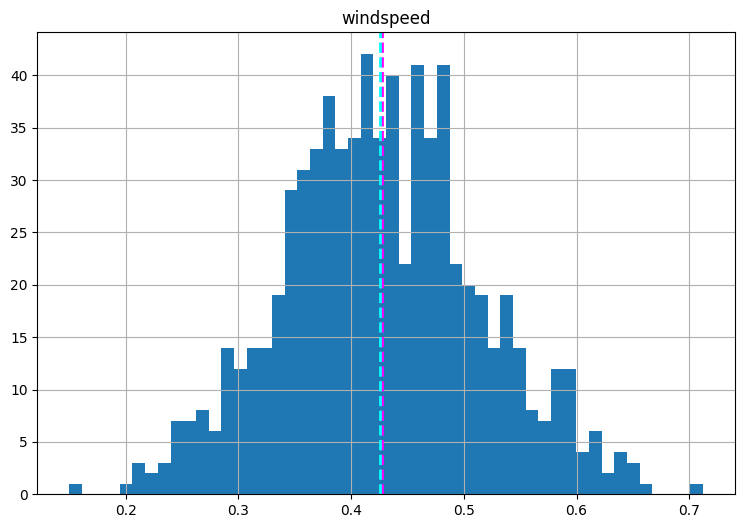

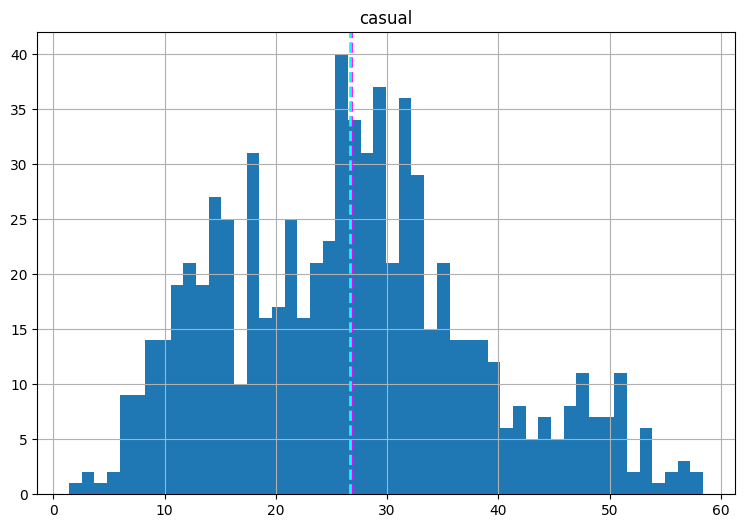

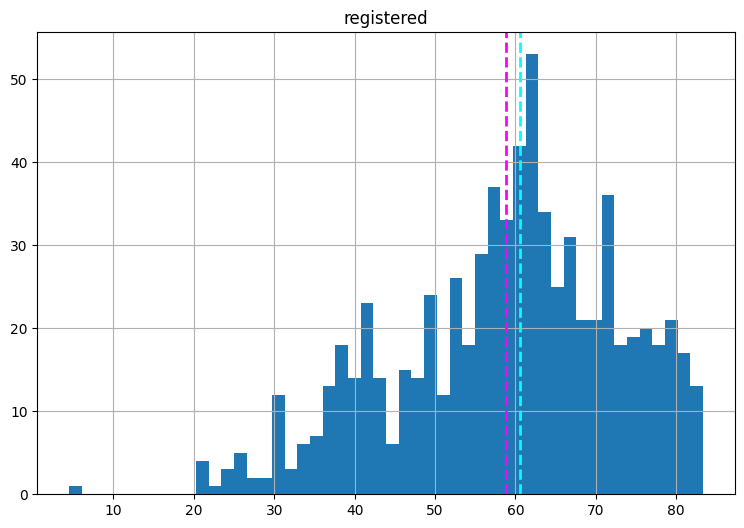

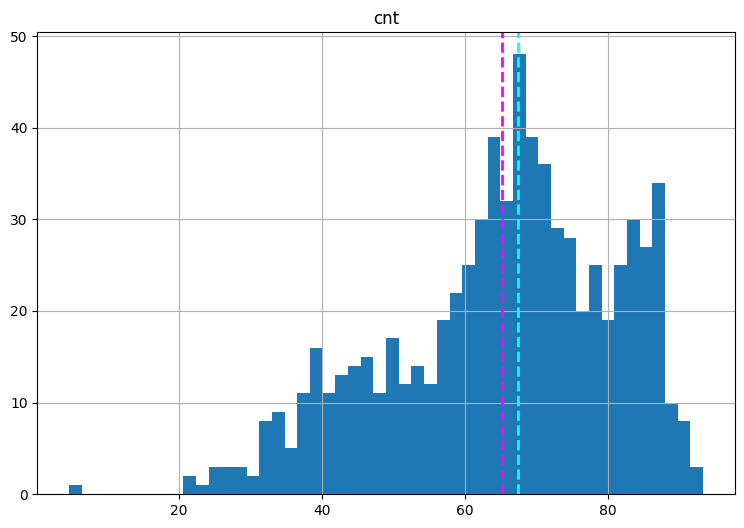

In [127]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [24]:
df.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [25]:
df.drop('atemp',inplace=True,axis=1)

In [26]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])


,variables,VIF
0,instant,2179.637740
1,season,24.795085
2,yr,834.078467
3,mnth,632.943083
4,holiday,1.109992
5,weekday,3.266231
6,workingday,9.443534
7,weathersit,14.567645
8,temp,20.647005
9,hum,26.008467


In [29]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum']]])


,variables,VIF
0,instant,2155.902975
1,season,24.691353
2,yr,825.260266
3,mnth,623.806847
4,holiday,1.103765
5,weekday,3.258822
6,workingday,9.353818
7,weathersit,7.764580
8,temp,19.401277
9,windspeed,5.485211


In [30]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed']]])


,variables,VIF
0,instant,2088.027312
1,season,24.638134
2,yr,795.846954
3,mnth,605.549397
4,holiday,1.096943
5,weekday,3.154957
6,workingday,9.184793
7,weathersit,7.250810
8,temp,18.766511
9,casual,8.522639


In [31]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed','registered']]])


,variables,VIF
0,instant,2073.367982
1,season,21.394445
2,yr,779.003953
3,mnth,602.047699
4,holiday,1.096028
5,weekday,3.133484
6,workingday,5.874554
7,weathersit,5.786123
8,temp,15.993564
9,casual,7.606587


In [32]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed','registered','temp']]])


,variables,VIF
0,instant,2068.658508
1,season,20.813784
2,yr,777.877992
3,mnth,600.855952
4,holiday,1.083603
5,weekday,3.129926
6,workingday,3.872125
7,weathersit,5.502632
8,casual,3.679987


In [33]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed','registered','temp','mnth']]])


,variables,VIF
0,instant,52.095814
1,season,20.091808
2,yr,22.299067
3,holiday,1.076129
4,weekday,3.106730
5,workingday,3.732275
6,weathersit,5.045891
7,casual,3.541158


In [34]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt','hum','windspeed','registered','temp','mnth','instant']]])


,variables,VIF
0,season,5.970934
1,yr,2.194535
2,holiday,1.075120
3,weekday,3.102463
4,workingday,3.684195
5,weathersit,5.045882
6,casual,3.452299


In [35]:
# 🎯 Create Dummy Columns for 'season'
# Check categories in 'season' column
df['season'].value_counts()

# Create dummy variables for the categorical variable 'season'
df['1'] = np.where(df['season'] == 1, 1, 0)  # Spring
df['2'] = np.where(df['season'] == 2, 1, 0)  # Summer
df['3'] = np.where(df['season'] == 3, 1, 0)  # Autumn
df['4'] = np.where(df['season'] == 4, 1, 0)  # Winter

# Drop the original 'season' column
df.drop(columns=['season'], axis=1, inplace=True)

# ============================
# 🎯 Create Dummy Columns for 'weathersit'
# ============================

# Check categories in 'weathersit' column
df['weathersit'].value_counts()

# Create dummy variables for the categorical variable 'weathersit'
df['Weather_1'] = np.where(df['weathersit'] == 1, 1, 0)
df['Weather_2'] = np.where(df['weathersit'] == 2, 1, 0)
df['Weather_3'] = np.where(df['weathersit'] == 3, 1, 0)
df['Weather_4'] = np.where(df['weathersit'] == 4, 1, 0)

# Drop the original 'weathersit' column
df.drop(columns=['weathersit'], axis=1, inplace=True)

# ============================
# ✅ Verify Changes
# ============================
df.head()


,instant,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,1,2,3,4,Weather_1,Weather_2,Weather_3,Weather_4
0,1,0,1,0,6,0,0.344167,0.805833,0.160446,331,654,985,1,0,0,0,0,1,0,0
1,2,0,1,0,0,0,0.363478,0.696087,0.248539,131,670,801,1,0,0,0,0,1,0,0
2,3,0,1,0,1,1,0.196364,0.437273,0.248309,120,1229,1349,1,0,0,0,1,0,0,0
3,4,0,1,0,2,1,0.200000,0.590435,0.160296,108,1454,1562,1,0,0,0,1,0,0,0
4,5,0,1,0,3,1,0.226957,0.436957,0.186900,82,1518,1600,1,0,0,0,1,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   temp        731 non-null    float64
 7   hum         731 non-null    float64
 8   windspeed   731 non-null    float64
 9   casual      731 non-null    int64  
 10  registered  731 non-null    int64  
 11  cnt         731 non-null    int64  
 12  1           731 non-null    int64  
 13  2           731 non-null    int64  
 14  3           731 non-null    int64  
 15  4           731 non-null    int64  
 16  Weather_1   731 non-null    int64  
 17  Weather_2   731 non-null    int64  
 18  Weather_3   731 non-null    int64  
 19  Weather_4   731 non-null    i

In [37]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
dependent_variable = 'cnt'

In [39]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['weekday',
 'Weather_4',
 'Weather_2',
 'temp',
 '2',
 'yr',
 'registered',
 'instant',
 'mnth',
 'workingday',
 'hum',
 'casual',
 'Weather_1',
 'holiday',
 'windspeed',
 'Weather_3',
 '4',
 '1',
 '3']

In [40]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
X_train[0:10]

,instant,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,1,2,3,4,Weather_1,Weather_2,Weather_3,Weather_4
97,98,0,4,0,5,1,0.335833,0.836250,0.226992,172,1299,0,1,0,0,0,1,0,0
503,504,1,5,0,5,1,0.564167,0.523333,0.136817,1521,6118,0,1,0,0,1,0,0,0
642,643,1,10,0,4,1,0.657500,0.722917,0.117546,891,6437,0,0,0,1,0,1,0,0
498,499,1,5,0,0,0,0.612500,0.576250,0.225117,2172,3946,0,1,0,0,1,0,0,0
303,304,0,10,0,1,1,0.340000,0.703333,0.106350,362,3307,0,0,0,1,1,0,0,0
570,571,1,7,0,2,1,0.750833,0.655000,0.211454,1140,6452,0,0,1,0,1,0,0,0
250,251,0,9,0,4,1,0.633913,0.939565,0.192748,153,1689,0,0,1,0,0,0,1,0
17,18,0,1,0,2,1,0.216667,0.861667,0.146775,9,674,1,0,0,0,0,1,0,0
595,596,1,8,0,6,0,0.678333,0.603333,0.177867,2827,5038,0,0,1,0,1,0,0,0
240,241,0,8,0,1,1,0.636667,0.554583,0.159825,729,3905,0,0,1,0,1,0,0,0


In [43]:
# Transforming data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 19)
(584,)
(147, 19)
(147,)


In [45]:
X_train[0:10]

array([[0.13287671, 0.        , 0.27272727, 0.        , 0.83333333,
        1.        , 0.35024023, 0.80442593, 0.48605788, 0.05181347,
        0.18466647, 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.6890411 , 1.        , 0.36363636, 0.        , 0.83333333,
        1.        , 0.63925722, 0.35526299, 0.24873701, 0.46296861,
        0.88045048, 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.87945205, 1.        , 0.81818182, 0.        , 0.66666667,
        1.        , 0.75739478, 0.64174706, 0.19801995, 0.27095398,
        0.92650881, 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.68219178, 1.        , 0.36363636, 0.        , 0.        ,
        0.        , 0.7004354 , 0.43122037, 0.48112329, 0.66138372,
        0.56684955, 0.        , 1.        , 0.        , 0.        ,
        1.   

In [47]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
# Cheeck coefficents
regressor.coef_

array([-24.40508462,  11.43383896,  11.43990901,  -1.18857153,
        -0.52737924,  -0.64501543,   3.66596972,  -0.85454682,
        -0.32027649,  22.40328223,  55.42440889,  -0.42287009,
         0.3440155 ,  -0.67723112,   0.75608571,   1.65914109,
         1.87625572,  -3.53539681,   0.        ])

In [49]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
instant,-24.405085
yr,11.433839
mnth,11.439909
holiday,-1.188572
weekday,-0.527379
workingday,-0.645015
temp,3.665970
hum,-0.854547
windspeed,-0.320276
casual,22.403282


In [50]:
regressor.intercept_

np.float64(28.834920698041806)

In [51]:
regressor.score(X_train,y_train)

0.9813795669412029

In [52]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred = regressor.predict(X_test)

In [53]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 1.7947963748152196.
The Mean Squred Error(MSE) is 6.034403277474508.
The Root Mean Squared Error(RMSE) is 2.4565022445490476.
The R2 Score is 0.978756296357208.
Adjusted R2 is 0.9755781044736407.


In [54]:
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [55]:
# create test_result dataframe
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,1.7948,6.0344,2.4565,0.9788,0.9756


In [56]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [57]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [58]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

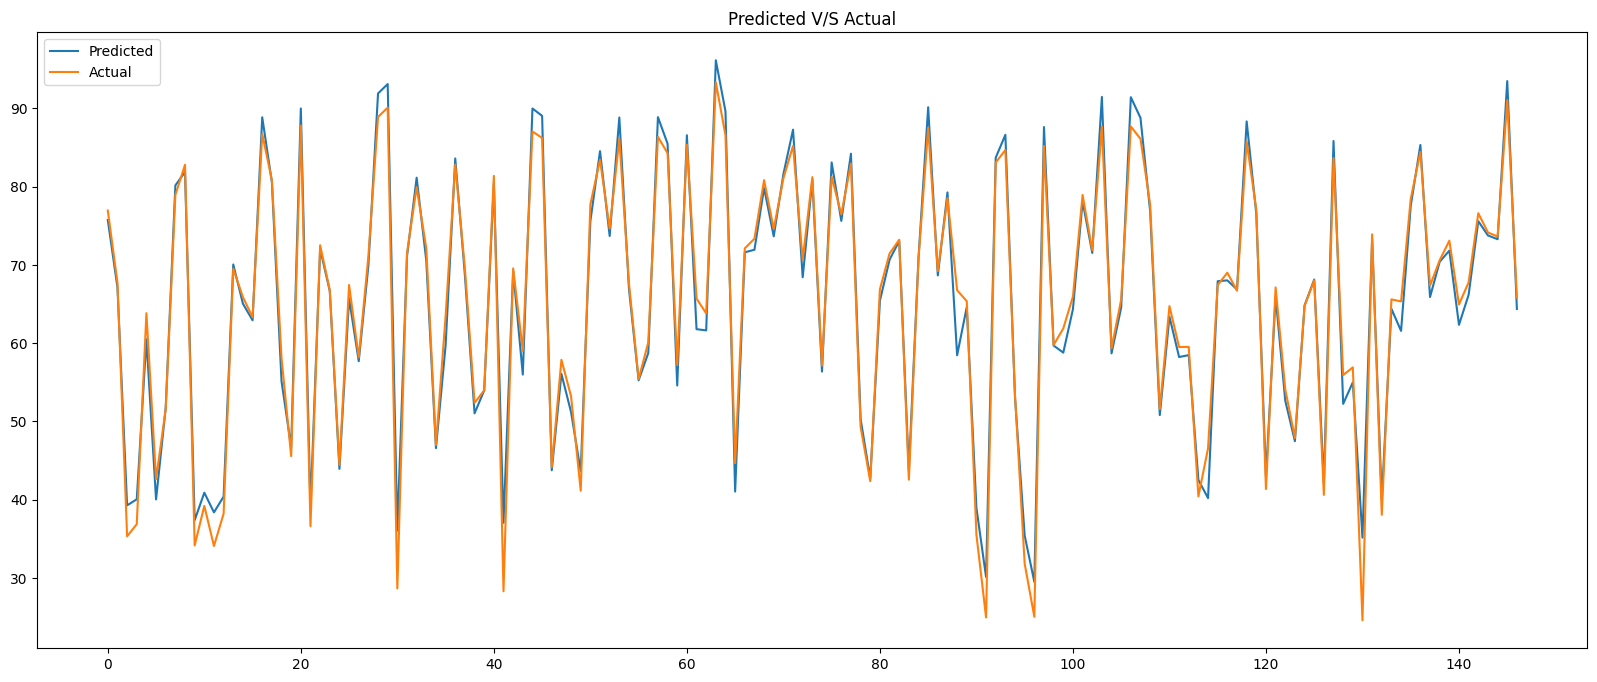

In [59]:

plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

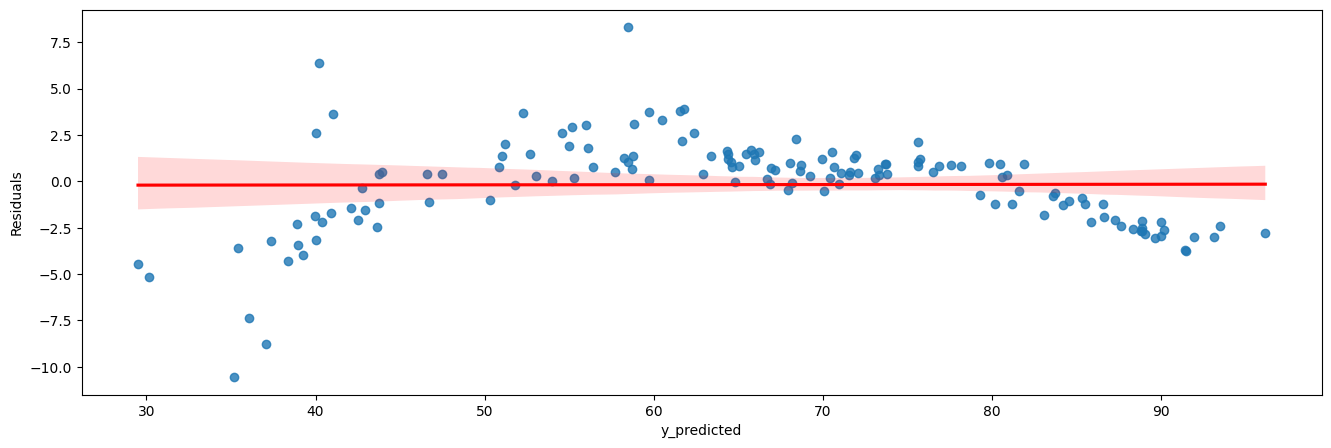

In [60]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

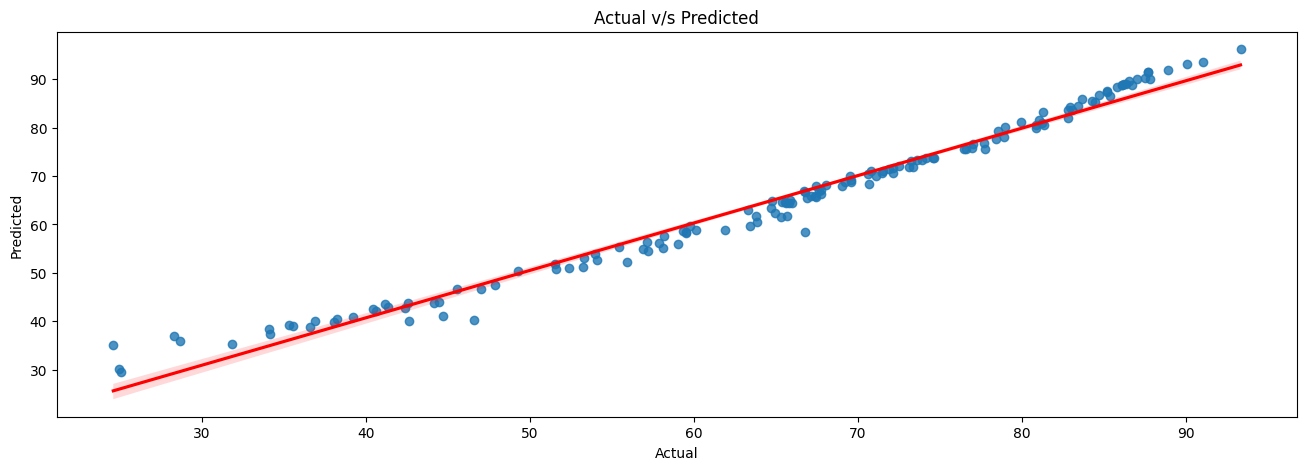

In [61]:
plot_scatter(y_pred,y_test)

C:\Users\gotlu\AppData\Local\Temp\ipykernel_24796\1719179543.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test-y_pred_test)


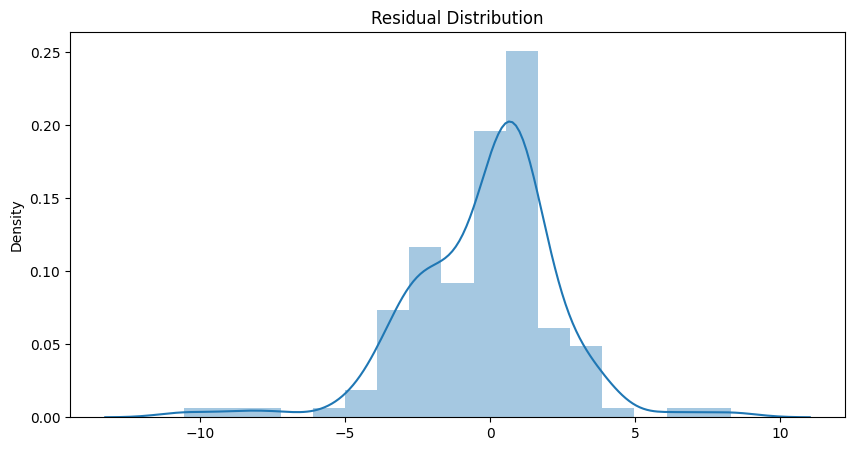

In [62]:
Residual_distPlot(y_pred,y_test)